# Tutorial de Matplot para graficas y de Reportes pagermill

A continuación se detalla un pequeño tutorial de como utilizar matplotlib y pagermill para la generacion de graficas y reportes respectivamente, este tutorial se basa en tres librerias:
- Matplotlib
- Numpy
- Pandas

Al finalizar el estudiante estará en la capacidad de generar graficas y enviar parametros para la realización de reportes utilizando Notebook. Además permite la lectura de archivos .csv y de diferentes tipos de graficos.


In [3]:
#importar las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Tarea

1 Con los datos de Fifa, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE

* Debajo 125 Lbs.
* 125-150
* 150-175
* 175 o superior

In [4]:
#Trabajar con otro tipo de datos Fifa
fifa = pd.read_csv('fifa_datos.csv')
#imprimir los primeros 5 datos del archivo
fifa.head()
fifa['Weight']=fifa['Weight'].astype(str).str.replace('\D+', '')
fifa['Weight'] = pd.to_numeric(fifa['Weight'])

In [5]:
debajo125 = fifa.loc[fifa['Weight'] < 125].count()[0]
entre125_150 = fifa.loc[(fifa['Weight'] >= 125) & (fifa['Weight'] < 150)].count()[0]
entre150_175 = fifa.loc[(fifa['Weight'] >= 150) & (fifa['Weight'] < 175)].count()[0]
superior175 = fifa.loc[fifa['Weight'] >= 175].count()[0]

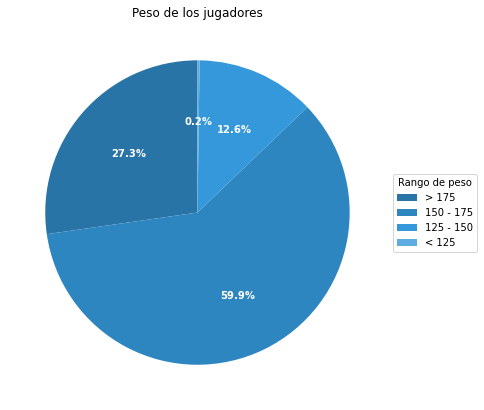

In [6]:
plt.figure(figsize=(12,7))
etiquetas = ['> 175','150 - 175','125 - 150','< 125']
colors = ['#2874A6','#2E86C1','#3498DB','#5DADE2']
plt.pie([superior175,entre150_175,entre125_150,debajo125], autopct='%1.1f%%', startangle=90,colors=colors,textprops={'color':"w",'weight':'bold'})
plt.title('Peso de los jugadores')
plt.legend(etiquetas, title="Rango de peso", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

2 Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall)  en base a los siguientes segmentos contando el número de jugadores

* 40
* 50
* 60
* 70
* 80
* 90
* 100

In [7]:
fifa['Overall']
valor_40 = fifa.loc[(fifa['Overall'] >= 40) & (fifa['Overall'] < 50)].count()[0]
valor_50 = fifa.loc[(fifa['Overall'] >= 50) & (fifa['Overall'] < 60)].count()[0]
valor_60 = fifa.loc[(fifa['Overall'] >= 60) & (fifa['Overall'] < 70)].count()[0]
valor_70 = fifa.loc[(fifa['Overall'] >= 70) & (fifa['Overall'] < 80)].count()[0]
valor_80 = fifa.loc[(fifa['Overall'] >= 80) & (fifa['Overall'] < 90)].count()[0]
valor_90 = fifa.loc[(fifa['Overall'] >= 90) & (fifa['Overall'] < 100)].count()[0]
valor_100 = fifa.loc[fifa['Overall'] > 100].count()[0]

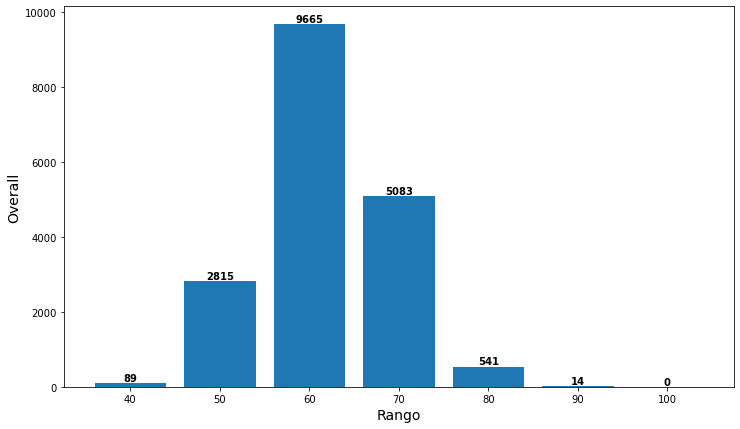

In [8]:
#Grafico de Barras
etiquetas = ['40', '50', '60', '70', '80', '90', '100']
valores = [valor_40,valor_50,valor_60,valor_70,valor_80,valor_90,valor_100]
plt.figure(figsize=(12,7))
plt.bar(etiquetas, valores)

for i in range(len(valores)):
    plt.annotate(str(valores[i]), xy=(etiquetas[i],valores[i]), ha='center', va='bottom', weight='bold')
    
plt.xlabel("Rango", size=14)
plt.ylabel("Overall", size=14)

plt.show() 

3 Investigar como pasar parametros y generar reportes utilizando Notebook, una de las formas es utilizar papermill

### Instalación de Papermill
!pip install papermill

Para realizar el paso de parámetros, en el cuaderno de Jupyter debe existir una celda que contenga las variables y los valores por defecto los cuales serán sobrescritos por Papermill, además la celda que contiene los parámetros debe ser etiqueta con un tag que contenga la palabra 'parameters'.

In [19]:
# Celda etiquetada 'parameters'.
alpha = 0.5
ratio = 0.1

### Inspección del cuaderno de Jupyter

Dentro de Papermill se utiliza 'inspect' para identificar cuales son los parámetros existentes dentro del cuaderno de Jupyter. Se debe especificar cual es el path del archivo a utilizar.

#### Ejecutar la inspección a través de la API de Python
    import papermill as pm
    
    pm.inspect_notebook('path/to/input.ipynb')

#### Ejecutar la inspección  a través de linea de comandos
    papermill --help-notebook ./path/to/input.ipynb

### Ejecución
Para la ejecución de un cuaderno se llama a la función execute_notebook con los siguiente parámetros de la propia función:

    execute_notebook(input notebook, output notebook, dictionary of parameters)

El diccionario de parámetros son los nuevos valores con los que correrá el archivo de Jupyter. 

#### Ejecutar la inspección a través de la API de Python

    import papermill as pm

    pm.execute_notebook(
       'path/to/input.ipynb',
       'path/to/output.ipynb',
       parameters=dict(alpha=0.6, ratio=0.1)
    )


#### Ejecutar a través de linea de comandos

De esta manera se pueden establecer los parámetros y los valores a utilizar (-p name value)

    papermill local/input.ipynb s3://bkt/output.ipynb -p alpha 0.6 -p l1_ratio 0.1

Ejecución haciendo uso de un archivo con los parámetros

    papermill local/input.ipynb s3://bkt/output.ipynb -f parameters.yaml

### Almacenamiento
Papermill puede almacenar cuadernos en AWS S3, Azure data blobs y Azure data lakes.

#### Azure

Se utilizan módulos para interactuar con el almacenamiento de datos de Azure, 

    module papermill.abs
    module papermill.adl

Los parámetros que se necesitan para interactuar con estos módulos son: nombre de la cuenta de usuario, sas_token y url 

Y se pueden utilizar las funciones de lectura, escritura y listar dada una url

### AWS

Se utiliza el módulo
    
    papermill.s3
    
Dentro de este módulo se pueden utilizar funciones como: 

##### cp_string: Copia la cadena con el contenido a copiar en la ubicación de destino.

##### list: Devuelve una lista de los archivos bajo el nombre de ruta especificado

##### list_dir: Devuelve una lista de los archivos bajo la ruta especificada.

##### read: Realiza la lectura de un archivo a manera de una iteración línea por línea.